**Getting our test set, transforming our categorical variables to numerical values and evaluating our first model**

In [41]:
import pandas as pd
import matplotlib as plt

In [42]:
df = pd.read_csv("project-3-files/learn_dataset.csv")
df

,Id,insee_code,is_student,OCCUPATION_42,ACTIVITY_TYPE,AGE_2019,household,Highest_degree,sex,target
0,1,01001,True,csp_6_8,TYPE1|1,20,TYPMR1-1,edu.1.4,Male,B
1,2,01004,False,csp_6_5,TYPE1|1,48,TYPMR4-1,edu.1.3,Male,B
2,3,01004,False,csp_8_1,TYPE1|2,37,TYPMR4-4,edu.1.8,Female,G
3,4,01004,False,csp_4_7,TYPE1|2,65,TYPMR3-1,edu.1.6,Male,B
4,5,01004,True,csp_8_4,TYPE2|2,22,TYPMR1-2,edu.1.4,Female,B
...,...,...,...,...,...,...,...,...,...,...
49988,99979,95680,False,csp_4_6,TYPE1|1,57,TYPMR1-2,edu.1.3,Female,B
49989,99981,95680,False,csp_8_5,TYPE2|5,25,TYPMR4-1,edu.1.4,Male,G
49990,99983,95680,True,csp_8_4,TYPE2|2,19,TYPMR4-2,edu.1.4,Female,B
49991,99984,95680,False,csp_4_7,TYPE1|1,48,TYPMR4-1,edu.1.7,Male,G


In [43]:
from sklearn.model_selection import train_test_split
import sklearn
sklearn.set_config(display="diagram")

**Our mission now is to understand whether our test set is correctly stratified**

**Unfortunately, we don't know for now which feature is the most explanatory for our target (label) variable. Therefore, we'll have to leave this on the side and come back to it later. I'm not even sure this is something we can do, since categories are spread out...**

In [44]:
X = df.drop(["target", "Id"], axis="columns")
y = df['target'].copy()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

Most ML algorithms prefer to work with numbers, so let's convert these categories from text to numbers.

In [46]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder


Okay so here I'll have to check the type of data we have, if it is ordinal, nominal, etc. To see whether this is the case, I have to check all the data. I'll do this in another jupyter notebook.

In [47]:
column_trans = make_column_transformer (
    (OneHotEncoder(), ["is_student", "OCCUPATION_42", "ACTIVITY_TYPE", "household", "sex"]),
    (OrdinalEncoder(), ["Highest_degree"]), #maybe I should check if it is well encoded 
    (ce.BinaryEncoder(), ["insee_code"]), 
    remainder='passthrough')
logreg = LogisticRegression(solver='lbfgs', max_iter=2000)

In [48]:
pipe = make_pipeline(column_trans, logreg)
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['is_student',
                                                   'OCCUPATION_42',
                                                   'ACTIVITY_TYPE', 'household',
                                                   'sex']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['Highest_degree']),
                                                 ('binaryencoder',
                                                  BinaryEncoder(),
                                                  ['insee_code'])])),
                ('logisticregression', LogisticRegression(max_iter=2000))])

In [49]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['is_student',
                                                   'OCCUPATION_42',
                                                   'ACTIVITY_TYPE', 'household',
                                                   'sex']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['Highest_degree']),
                                                 ('binaryencoder',
                                                  BinaryEncoder(),
                                                  ['insee_code'])])),
                ('logisticregression', LogisticRegression(max_iter=2000))])

In [50]:
cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy").mean()

0.7560508644092014

In [51]:
y.value_counts(normalize=True) #null accuracy is what we get if we simply predict the most frequent class (here B).

B    0.614646
G    0.385354
Name: target, dtype: float64

In [52]:
# If we want to test this model on new data, here is the code
# pipe.fit(X, y)
# pipe.predict(X_new)

In [53]:
y_pred = pipe.predict(X_train)

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming y_pred is your predicted labels
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, pos_label='G')
recall = recall_score(y_train, y_pred, pos_label='G')
f1 = f1_score(y_train, y_pred, pos_label='G')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.7702814687812545
Precision: 0.7233065442020666
Recall: 0.6540600667408232
F1 Score: 0.6869426379531913


In [65]:
from sklearn.tree import  DecisionTreeClassifier

In [66]:
tree_clf = make_pipeline(column_trans, DecisionTreeClassifier(random_state=42))
tree_clf.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['is_student',
                                                   'OCCUPATION_42',
                                                   'ACTIVITY_TYPE', 'household',
                                                   'sex']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['Highest_degree']),
                                                 ('binaryencoder',
                                                  BinaryEncoder(),
                                                  ['insee_code'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [67]:
y_pred = tree_clf.predict(X)

In [68]:
cross_val_score(tree_clf, X, y, cv=5, scoring="accuracy").mean()

0.6709941748325663

In [69]:
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, pos_label='G')
recall = recall_score(y, y_pred, pos_label='G')
f1 = f1_score(y, y_pred, pos_label='G')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.9997799691956873
Precision: 1.0
Recall: 0.9994290163508954
F1 Score: 0.99971442664659


In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
cm

array([[30728,     0],
       [   11, 19254]])

It is overfitting the data.

Let's try SDGClassifier

In [82]:
from sklearn.linear_model import SGDClassifier

In [83]:
sgd_clf = make_pipeline(column_trans, SGDClassifier(random_state=42))
sgd_clf.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['is_student',
                                                   'OCCUPATION_42',
                                                   'ACTIVITY_TYPE', 'household',
                                                   'sex']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['Highest_degree']),
                                                 ('binaryencoder',
                                                  BinaryEncoder(),
                                                  ['insee_code'])])),
                ('sgdclassifier', SGDClassifier(random_state=42))])

In [87]:
cross_val_score(sgd_clf, X_train, y_train, cv=5, scoring="accuracy").mean()

0.678782683240463

let's see the decision function and the curve associated to our function

In [88]:
from sklearn.model_selection import cross_val_predict

In [94]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=5, method="decision_function")

In [90]:
from sklearn.metrics import precision_recall_curve

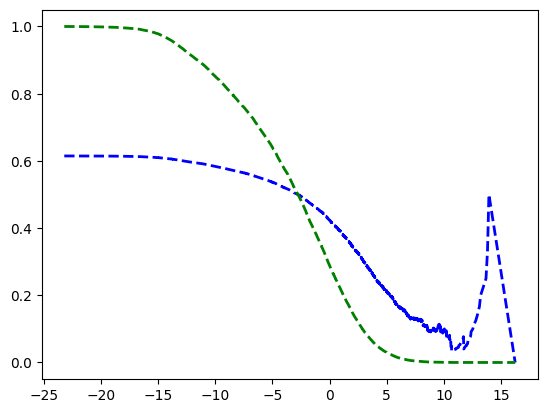

In [101]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores, pos_label="B")
import matplotlib.pyplot as plt

plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g--", label="Recall", linewidth=2)
